<center>

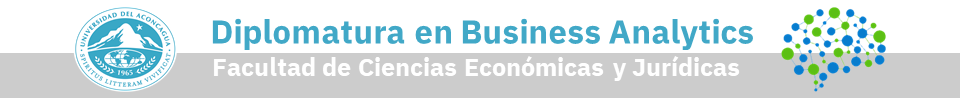

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final - Módulo 7 - Introducción a Python y Pandas

</font>
</center>

~~~
Apellido y Nombre: Liquitay Alexandra Romina
~~~

# Aclaraciones previas



*   En cada celda se indica lo solicitado.
*   Se pueden generar la cantidad de scripts necesarios.
*   Puede explicar insertando celdas de texto.
*   Para graficar se puede utilizar cualquier librería.
*   Al finalizar, descargar el archivo y entregarlo por el campus.
*   Al finalizar se debería borrar esta celda.



# Activar módulos necesarios

In [ ]:
!pip install pandas==1.3.2
!pip install matplotlib==3.4.3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")

# Obtener datos

In [ ]:
ventas_url="/content/Analisis_de_Facturas_de_Venta.csv"

# Crear un DataFrame

In [ ]:
fc_ventas = pd.read_csv(ventas_url)

## Visualizaciones del DataFrame

####Visualizar todas las columnas y filas para analizar las modificaciones a realizar

In [ ]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Información del DataFrame y de los datos

In [ ]:
fc_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DOCUMENTO              159 non-null    object 
 1   ORGANIZACION           159 non-null    object 
 2   FECHA                  159 non-null    object 
 3   TIPOFACTURA            159 non-null    object 
 4   PRODUCTO               159 non-null    object 
 5   CANTIDAD               159 non-null    float64
 6   PRECIO                 159 non-null    float64
 7   IMPORTEMONTRANSACCION  159 non-null    float64
 8   MONEDA                 159 non-null    object 
dtypes: float64(3), object(6)
memory usage: 11.3+ KB


# Trabajando con el DataFrame

## Eliminando datos no disponibles y duplicados

In [ ]:
fc_ventas_unicas = fc_ventas.drop_duplicates(subset= "DOCUMENTO")
fc_ventas_unicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DOCUMENTO              138 non-null    object 
 1   ORGANIZACION           138 non-null    object 
 2   FECHA                  138 non-null    object 
 3   TIPOFACTURA            138 non-null    object 
 4   PRODUCTO               138 non-null    object 
 5   CANTIDAD               138 non-null    float64
 6   PRECIO                 138 non-null    float64
 7   IMPORTEMONTRANSACCION  138 non-null    float64
 8   MONEDA                 138 non-null    object 
dtypes: float64(3), object(6)
memory usage: 10.8+ KB


##Formateando la columna Fecha

In [ ]:
fc_ventas_unicas["FECHA"]=pd.to_datetime(fc_ventas_unicas["FECHA"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##Separar la información de la columna DOCUMENTO

In [ ]:
fc_ventas_unicas[["Letra","Punto_Venta","Num_Comp"]] = fc_ventas_unicas["DOCUMENTO"].str.split("-", expand = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


##Eliminar la columna DOCUMENTO original

In [ ]:
fc_ventas_unicas.drop(["DOCUMENTO"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Renombrando columnas

###Conocer el nombre de las columnas para determinar cuales serán modificadas

In [ ]:
print(fc_ventas_unicas.columns)

Index(['ORGANIZACION', 'FECHA', 'TIPOFACTURA', 'PRODUCTO', 'CANTIDAD',
       'PRECIO', 'IMPORTEMONTRANSACCION', 'MONEDA', 'Letra', 'Punto_Venta',
       'Num_Comp'],
      dtype='object')


In [ ]:
fc_ventas_unicas.rename(columns={
    "ORGANIZACION" : "Cliente",
    "FECHA":"Fecha",
    "TIPOFACTURA":"Tipo_Comprobante",
    "PRODUCTO": "Producto", 
    "CANTIDAD": "Cantidad",
    "PRECIO": "Precio_Unitario",
    "IMPORTEMONTRANSACCION": "Precio_Total", 
    "MONEDA":"Moneda"
}, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Insertando columna Tipo_Producto

In [ ]:
servicios=[
           'Publicidad y Marketing',
           'Consultoria Web','Dise–o Web', 
           'Honorarios','Intereses por Mora',
           'Servicios Profesionales',
           'Consultoria Digital']
fc_ventas_unicas["Tipo_producto"]=fc_ventas_unicas.apply(
    lambda row: "Servicio" if row.Producto in servicios else "Producto", axis=1
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Reindexando index

In [ ]:
print(fc_ventas_unicas.columns)

Index(['Cliente', 'Fecha', 'Tipo_Comprobante', 'Producto', 'Cantidad',
       'Precio_Unitario', 'Precio_Total', 'Moneda', 'Letra', 'Punto_Venta',
       'Num_Comp', 'Tipo_producto'],
      dtype='object')


In [ ]:
fc_ventas_unicas=fc_ventas_unicas.reindex(columns=['Fecha',
                                  'Letra',
                                  'Tipo_Comprobante',
                                  'Punto_Venta', 
                                  'Num_Comp',
                                  'Cliente',
                                  'Tipo_producto', 
                                  'Producto', 
                                  'Moneda',
                                  'Cantidad',
                                  'Precio_Unitario', 
                                  'Precio_Total', 
                                  ])

##Ordenar datos en función de la fecha del comprobante

In [ ]:
fc_ventas_unicas=fc_ventas_unicas.sort_values(by="Fecha")

# Grabando

## Grabar el DataFrame como un archivo CSV

In [ ]:
fc_ventas_unicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 157 to 0
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             138 non-null    datetime64[ns]
 1   Letra             138 non-null    object        
 2   Tipo_Comprobante  138 non-null    object        
 3   Punto_Venta       138 non-null    object        
 4   Num_Comp          138 non-null    object        
 5   Cliente           138 non-null    object        
 6   Tipo_producto     138 non-null    object        
 7   Producto          138 non-null    object        
 8   Moneda            138 non-null    object        
 9   Cantidad          138 non-null    float64       
 10  Precio_Unitario   138 non-null    float64       
 11  Precio_Total      138 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 14.0+ KB


In [ ]:
fc_ventas_unicas.to_csv("Ventas_2018to2019.csv", index=False)

# Gráficos

## Desarrollar gráficos del DataFrame

###**1)Análisis de Ventas por Trimestre y Año**

###Crear DataFrame por año y trimestre

In [ ]:
ventas_trimestre=fc_ventas_unicas.groupby(
    [fc_ventas_unicas["Fecha"].dt.year.rename("Anio"),
     fc_ventas_unicas["Fecha"].dt.quarter.rename("Trimestre")]).sum()
ventas_trimestre=ventas_trimestre.reset_index()

###Unir Año y Trimestre

In [ ]:
ventas_trimestre["Fecha2"] = ventas_trimestre["Anio"].map(str)+"-"+ventas_trimestre["Trimestre"].map(str)
ventas_trimestre.Precio_Total=ventas_trimestre.Precio_Total.map(
    lambda value: round(value/1000,2)
)


###Graficar

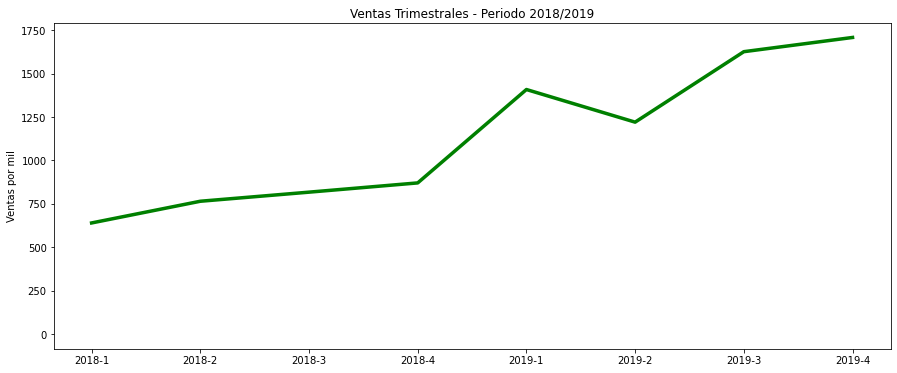

In [ ]:
labels = ventas_trimestre.Fecha2
ventas = ventas_trimestre.Precio_Total

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.plot(x, ventas, width, color= "green",linewidth=3.5)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ventas por mil')
ax.set_title('Ventas Trimestrales - Periodo 2018/2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)


plt.savefig("image.png")

plt.show()

###**2)Análisis de Ventas por Cliente**

In [ ]:
ventas_clientes=fc_ventas_unicas.groupby(
                  fc_ventas_unicas["Cliente"]
                ).sum().reset_index().sort_values(by="Precio_Total",ascending=False)
ventas_clientes.Precio_Total=ventas_clientes.Precio_Total.map(
    lambda value: round(value/1000,2)
)

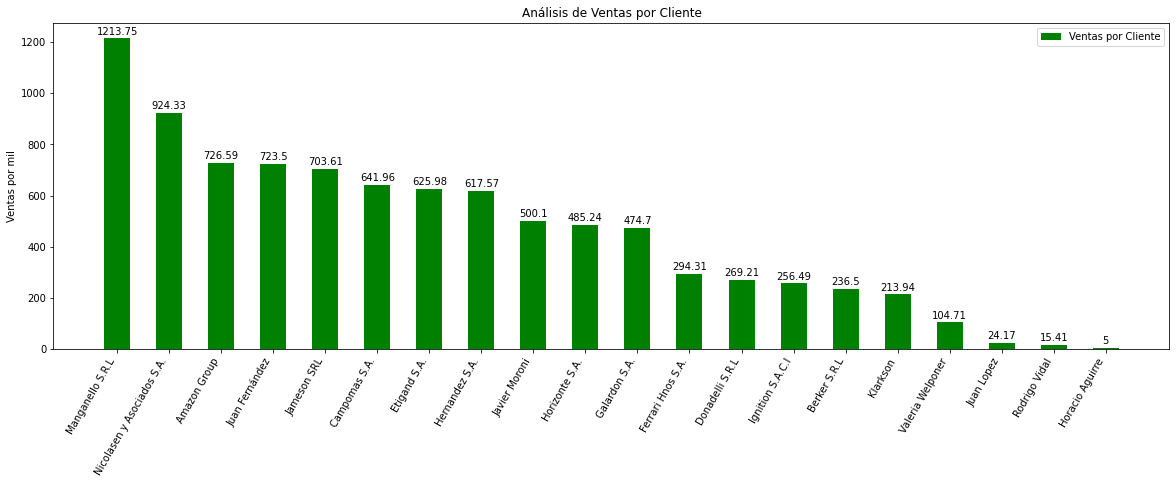

In [ ]:
labels = ventas_clientes.Cliente
ventas = ventas_clientes.Precio_Total

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(20,6))
rects1 = ax.bar(x, ventas, width, label='Ventas por Cliente', color="green")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ventas por mil')
ax.set_title('Análisis de Ventas por Cliente')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 60, ha="right")
ax.legend()

ax.bar_label(rects1, padding=2)
plt.savefig("image2.png")
plt.show()

###**3) Ventas de Productos vs Venta de Servicios**

###Obtener listado de productos

In [ ]:
ventas_byproducto=fc_ventas_unicas.groupby([
    fc_ventas_unicas.Fecha.dt.year,
    fc_ventas_unicas.Tipo_producto]).sum().reset_index()
                                   

In [ ]:
ventas_2018 = ventas_byproducto[ventas_byproducto["Fecha"]==2018]
ventas_2019 = ventas_byproducto[ventas_byproducto["Fecha"]==2019]

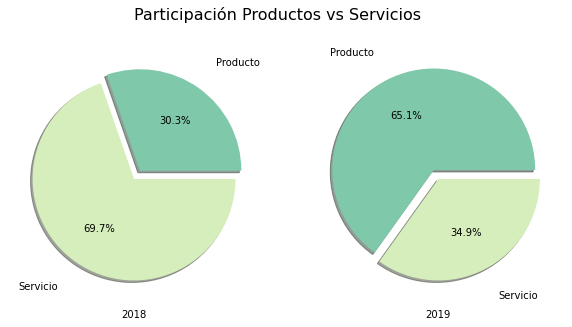

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

fig.suptitle('Participación Productos vs Servicios', fontsize=16)

labels = ventas_2018["Tipo_producto"]
values = ventas_2018["Precio_Total"]
ax1.pie(values, labels = labels, autopct='%1.1f%%',colors = ['#7FC8A9','#D5EEBB'],explode = (0.1, 0),shadow=True, labeldistance=1.3)
ax1.set_xlabel("2018")


labels = ventas_2019["Tipo_producto"]
values = ventas_2019["Precio_Total"]
ax2.pie(values, labels = labels, autopct='%1.1f%%', colors = ['#7FC8A9','#D5EEBB'],explode = (0.1, 0),shadow=True, labeldistance=1.3)
ax2.set_xlabel("2019")

plt.savefig("image3.png")

plt.show()
